# Ames Housing ML Challenge


In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

from sklearn.linear_model import LinearRegression, HuberRegressor


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
test.shape

In [ ]:
### Reference
#https://www.kaggle.com/vikassingh1996/
#comprehensive-data-preprocessing-and-modeling

# 1.0 EDA

In [ ]:
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

### Looking at the column values in the train dataset

In [ ]:
train.columns.values


###  Isolating the Numerical variables 

In [ ]:
train.dtypes

## Exploring Relationships

### Correlation heatmap for all Continuous variables

In [ ]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

###  Top 10 Correlations

In [ ]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


#### Highest Correlations seem to be: 
   - Overall Quality
   - Great Living Area
   - Garage Cars
   - Garage Area
   - Total Basement SF
   - First Floor SF
   - Full Bathrooms
   - Total Rooms above ground
   - Year Built

# Linearity and Remove Outliers

#### 1stFlrSF vs. Sale Price

In [ ]:
sns.regplot(x=train["1stFlrSF"], y=train["SalePrice"])

In [ ]:
#threshold = 2000

#train = train[train.loc[:,'1stFlrSF'] < threshold]


##### GrLivArea vs. Sale Price

In [ ]:
sns.regplot(x=train["GrLivArea"], y=train["SalePrice"])

In [ ]:
#threshold = 2500

#train = train[train.loc[:,'GrLivArea'] < threshold]




##### Garage Area vs. SalePrice

There was a very large number of 0 observations, Meaning that there is no garage. I eliminated these because they do neither add nor subtract anything from the analysis.

In [ ]:
sns.regplot(x=train["GarageArea"], y=train["SalePrice"])

In [ ]:
#threshold = 1000

#train = train[train.loc[:,'GarageArea'] < threshold]

##### Total Basement SF vs. SalePrice

In [ ]:

sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"])

In [ ]:
#threshold = 2000

#train = train[train.loc[:,'TotalBsmtSF'] < threshold]


##### Total Rooms Above Ground vs. SalePrice

In [ ]:

sns.regplot(x=train['TotRmsAbvGrd'], y=train["SalePrice"])

In [ ]:
#threshold = 14

#train = train[train.loc[:,'TotRmsAbvGrd'] < threshold]

## 2. Missing Variables

In [2]:
###### Combining Data
ntrain = train.shape[0]
ntest = test.shape[0]

housing_merge = pd.merge(train, test, how='outer').reset_index(drop=True)

y_sale = pd.DataFrame(train['SalePrice'])
id_temp = pd.DataFrame(housing_merge['Id'])


housing_merge.drop(['Id'], axis=1, inplace=True)
housing_merge.drop(['SalePrice'], axis=1, inplace=True)

print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
#print("Combined dataset size is : {}".format(housing_merge.shape))

Train data size is : (1460, 81)
Test data size is : (1459, 80)


In [ ]:
train.head()

In [3]:
total = housing_merge.isna().sum()/housing_merge.isna().count()
sum=housing_merge.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

,Perc,Sum
PoolQC,0.996574,2909
MiscFeature,0.964029,2814
Alley,0.932169,2721
Fence,0.804385,2348
FireplaceQu,0.486468,1420
LotFrontage,0.166495,486
GarageYrBlt,0.054471,159
GarageFinish,0.054471,159
GarageQual,0.054471,159
GarageCond,0.054471,159


In [4]:
housing_merge.drop(['PoolQC', 'FireplaceQu'], axis=1, inplace=True)

In [5]:
housing_merge['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

#### Converting categorical variables in the merged dataset

In [6]:
housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

### Imputation

#### Imputing mode for MSZoning, Electrical, Utilites, Exterior1st/2nd, KitchenQual, Functional, SaleType, TotalSF

In [7]:
## MSZoning
housing_merge['MSZoning']=housing_merge['MSZoning'].fillna('RL')
print('MSZoning unique Values: ', train['MSZoning'].unique())

MSZoning unique Values:  ['RL' 'RM' 'C (all)' 'FV' 'RH']


In [8]:
## Electrical
housing_merge['Electrical']=housing_merge['Electrical'].fillna('SBrkr')
print('Electrical unique values: ', housing_merge['Electrical'].unique())

Electrical unique values:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


In [9]:
## Utilities
housing_merge['Utilities']=housing_merge['Utilities'].fillna('AllPub')
print('Utility unique values: ', housing_merge['Utilities'].unique())

Utility unique values:  ['AllPub' 'NoSeWa']


In [10]:
## Exterior1st
housing_merge['Exterior1st']=housing_merge['Exterior1st'].fillna('VinylSd')
print('Exterior1st unique values: ', housing_merge['Exterior1st'].unique())

Exterior1st unique values:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [11]:
## Exterior2nd
housing_merge['Exterior2nd']=housing_merge['Exterior2nd'].fillna('VinylSd')
print('Exterior2nd unique values: ', housing_merge['Exterior2nd'].unique())

Exterior2nd unique values:  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


In [12]:

## KitchenQual
housing_merge['KitchenQual']=housing_merge['KitchenQual'].fillna('TA')
print('Kitchen Quality unique values: ', housing_merge['KitchenQual'].unique())

Kitchen Quality unique values:  ['Gd' 'TA' 'Ex' 'Fa']


In [13]:
#Functional
housing_merge['Functional']=housing_merge['Functional'].fillna('Typ')
print('Functional unique values: ', housing_merge['Functional'].unique())

Functional unique values:  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


In [14]:
##SaleType
housing_merge['SaleType']=housing_merge['SaleType'].fillna('WD')
print('SaleType unique values: ', housing_merge['SaleType'].unique())


SaleType unique values:  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


  #### Imputing median for Lot Frontage,  MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea

In [15]:
import numpy as np
def fill_with_random(housing_merge, column):
    '''Fill `df2`'s column with name `column` with random data based on non-NaN data from `column`'''
    housing_merge['LotFrontage'] = housing_merge['LotFrontage'].apply(lambda x: np.random.choice(housing_merge['LotFrontage'].dropna().values) if np.isnan(x) else x)
    return housing_merge


In [16]:
# LotFrontage
fill_with_random(housing_merge, housing_merge['LotFrontage'])
#.fillna(housing_merge['LotFrontage'].mean(), inplace=True)
print('LotFrontage missing:', housing_merge['LotFrontage'].isna().sum())


LotFrontage missing: 0


In [17]:
# MasVnrArea

housing_merge['MasVnrArea'] = housing_merge['MasVnrArea'].apply(lambda x: np.random.choice(housing_merge['MasVnrArea'].dropna().values) if np.isnan(x) else x)

#housing_merge['MasVnrArea'].fillna(housing_merge['MasVnrArea'].mean(), inplace=True)
print('MasVnrArea missing:', housing_merge['MasVnrArea'].isna().sum())


MasVnrArea missing: 0


In [18]:
# BsmtFinSF1
#housing_merge['BsmtFinSF1'].fillna(housing_merge['BsmtFinSF1'].mean(), inplace=True)

housing_merge['BsmtFinSF1'] = housing_merge['BsmtFinSF1'].apply(lambda x: np.random.choice(housing_merge['BsmtFinSF1'].dropna().values) if np.isnan(x) else x)
print('BsmtFinSF1 missing:', housing_merge['BsmtFinSF1'].isna().sum())


BsmtFinSF1 missing: 0


In [19]:
# BsmtFinSF2
#housing_merge['BsmtFinSF2'].fillna(housing_merge['BsmtFinSF2'].mean(), inplace=True)
housing_merge['BsmtFinSF2'] = housing_merge['BsmtFinSF2'].apply(lambda x: np.random.choice(housing_merge['BsmtFinSF2'].dropna().values) if np.isnan(x) else x)
print('BsmtFinSF2 missing:', housing_merge['BsmtFinSF2'].isna().sum())


BsmtFinSF2 missing: 0


In [20]:
# BsmtUnfSF
#housing_merge['BsmtUnfSF'].fillna(housing_merge['BsmtUnfSF'].mean(), inplace=True)
housing_merge['BsmtUnfSF'] = housing_merge['BsmtUnfSF'].apply(lambda x: np.random.choice(housing_merge['BsmtUnfSF'].dropna().values) if np.isnan(x) else x)
print('BsmtunfSF missing:', housing_merge['BsmtUnfSF'].isna().sum())


BsmtunfSF missing: 0


In [21]:
# TotalBasmtSF
#housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)

housing_merge['TotalBsmtSF'] = housing_merge['TotalBsmtSF'].apply(lambda x: np.random.choice(housing_merge['TotalBsmtSF'].dropna().values) if np.isnan(x) else x)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())



TotalBsmtSF missing: 0


In [22]:
# GarageArea
#housing_merge['GarageArea'].fillna(housing_merge['GarageArea'].mean(), inplace=True)

housing_merge['GarageArea'] = housing_merge['GarageArea'].apply(lambda x: np.random.choice(housing_merge['GarageArea'].dropna().values) if np.isnan(x) else x)
print('GarageArea missing:', housing_merge['GarageArea'].isna().sum())



GarageArea missing: 0


In [23]:
# Total Bsmt Sf
#housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
housing_merge['TotalBsmtSF'] = housing_merge['TotalBsmtSF'].apply(lambda x: np.random.choice(housing_merge['TotalBsmtSF'].dropna().values) if np.isnan(x) else x)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())




TotalBsmtSF missing: 0


#### Imputing median for Bsmt FullBath, BsmtHalfBath, GarageCars, GarageYrBlt

In [24]:
##BedroomAbvGr
housing_merge['BedroomAbvGr'].fillna(housing_merge['BedroomAbvGr'].median(),inplace = True)
print('BedroomAbvGr missing: ', housing_merge['BedroomAbvGr'].isna().sum())

BedroomAbvGr missing:  0


In [25]:
# BsmtFullBath
housing_merge['BsmtFullBath'].fillna(housing_merge['BsmtFullBath'].median(), inplace=True)
print('BsmtFullBath missing:', housing_merge['BsmtFullBath'].isna().sum())



BsmtFullBath missing: 0


In [26]:
#BsmtHalfBath
housing_merge['BsmtHalfBath'].fillna(housing_merge['BsmtHalfBath'].median(), inplace=True)
print('BsmtHalfBath missing:', housing_merge['BsmtHalfBath'].isna().sum())

BsmtHalfBath missing: 0


In [27]:
#Garage Cars
housing_merge['GarageCars'].fillna(housing_merge['GarageCars'].median(), inplace=True)
print('GarageCars missing:', housing_merge['GarageCars'].isna().sum())

GarageCars missing: 0


In [28]:
#GarageYrBlt
housing_merge['GarageYrBlt'].fillna(housing_merge['GarageYrBlt'].median(), inplace=True)
print('GarageYrBlt missing:', housing_merge['GarageYrBlt'].isna().sum())

GarageYrBlt missing: 0


In [29]:
#Fireplaces
housing_merge['Fireplaces'].fillna(housing_merge['Fireplaces'].median(), inplace=True)
print('Fireplaces missing:', housing_merge['Fireplaces'].isna().sum())

Fireplaces missing: 0


In [30]:
#FullBath
housing_merge['FullBath'].fillna(housing_merge['FullBath'].median(), inplace=True)
print('FullBath missing:', housing_merge['FullBath'].isna().sum())

FullBath missing: 0


In [31]:
#HalfBath 
housing_merge['HalfBath'].fillna(housing_merge['HalfBath'].median(), inplace=True)
print('HalfBath  missing:', housing_merge['HalfBath'].isna().sum())

HalfBath  missing: 0


In [32]:

#KitchenAbvGr 
housing_merge['KitchenAbvGr'].fillna(housing_merge['KitchenAbvGr'].median(), inplace=True)
print('KitchenAbvGr  missing:', housing_merge['KitchenAbvGr'].isna().sum())

KitchenAbvGr  missing: 0


In [33]:
#MSSubClass 
housing_merge['MSSubClass'].fillna(housing_merge['MSSubClass'].median(), inplace=True)
print('MSSubClass  missing:', housing_merge['MSSubClass'].isna().sum())

MSSubClass  missing: 0


In [34]:
#MoSold 
housing_merge['MoSold'].fillna(housing_merge['MoSold'].median(), inplace=True)
print('MoSold missing:', housing_merge['MoSold'].isna().sum())

MoSold missing: 0


In [35]:
#OverallCond 
housing_merge['OverallCond'].fillna(housing_merge['OverallCond'].median(), inplace=True)
print('OverallCond missing:', housing_merge['OverallCond'].isna().sum())

OverallCond missing: 0


In [36]:
#OverallQual
housing_merge['OverallQual'].fillna(housing_merge['OverallQual'].median(), inplace=True)
print('OverallQual missing:', housing_merge['OverallQual'].isna().sum())

OverallQual missing: 0


In [37]:
#YrSold
housing_merge['YrSold'].fillna(housing_merge['YrSold'].median(), inplace=True)
print('YrSold missing:', housing_merge['YrSold'].isna().sum())

YrSold missing: 0


In [38]:
housing_merge.LotArea.isna().sum()

0

#### Imputing 'None' for missing values where NaN is meaningful, i.e. PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageCOnd, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrType

In [39]:
impute_none = housing_merge.loc[:, [ 'MiscFeature', 'Alley', 'Fence',
                                    'GarageType', 'GarageCond','GarageFinish','GarageQual',
                                    'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
                                    'MasVnrType']]
for i in impute_none.columns:
    housing_merge[i].fillna('None', inplace = True)

In [40]:
#Check
missing_columns = housing_merge.columns[housing_merge.isnull().any()].values
missing_columns = len(housing_merge) - housing_merge.loc[:, np.sum(housing_merge.isnull())>0].count()
missing_columns

Series([], dtype: int64)

In [41]:
housing_merge.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64


In [ ]:
housing_merge.isna().sum()

### Creating New Features

In [42]:
######### New Features

housing_merge['TotalSF'] = (housing_merge['BsmtFinSF1'] + housing_merge['BsmtFinSF2'] 
                           + housing_merge['1stFlrSF'] + housing_merge['2ndFlrSF'])



In [43]:

#housing_merge['TotalBathrooms'] = (housing_merge['FullBath'] + (0.5*housing_merge['HalfBath']) +
                              housing_merge['BsmtFullBath'] + (0.5*housing_merge['BsmtHalfBath']))



In [44]:
housing_merge['TotalPorchSF'] = (housing_merge['OpenPorchSF'] + housing_merge['3SsnPorch'] +
                             housing_merge['EnclosedPorch'] + housing_merge['ScreenPorch'] +
                              housing_merge['WoodDeckSF'])

In [45]:
housing_merge.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
                 ..
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0


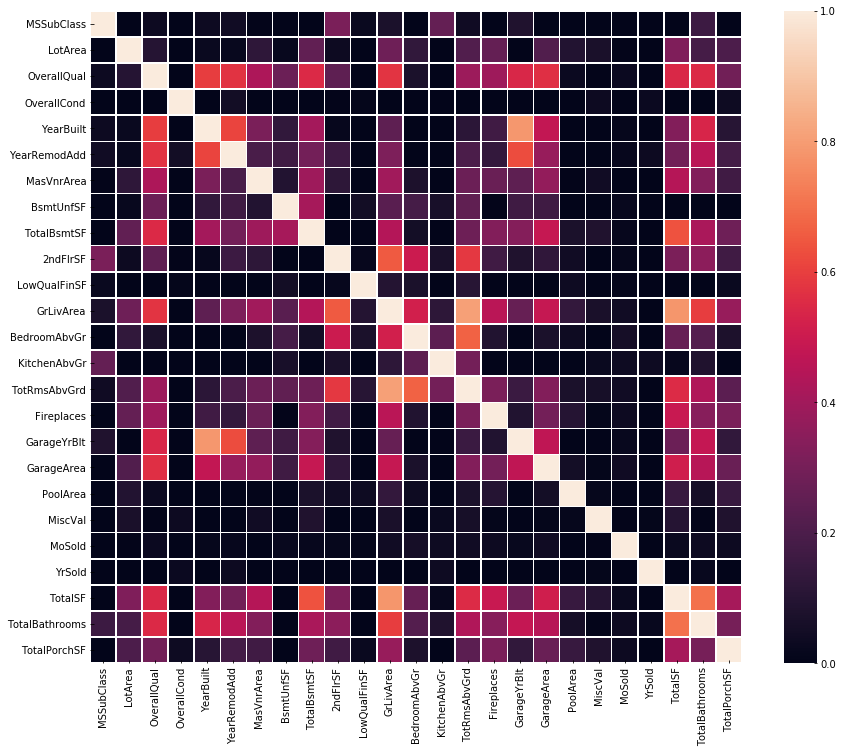

In [52]:
corr = housing_merge.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

In [47]:
housing_merge.drop(['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)

In [48]:
housing_merge.drop(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF'], axis=1, inplace=True)

In [49]:
housing_merge.drop(['3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'OpenPorchSF'], axis=1, inplace=True)

In [50]:
housing_merge.drop(['GarageCars'], axis=1, inplace=True)

In [51]:
housing_merge.drop(['LotFrontage'], axis=1, inplace=True)

In [53]:
numeric_cols = housing_merge.dtypes[housing_merge.dtypes != "object"].index

In [54]:
categori_cols = housing_merge.dtypes[housing_merge.dtypes == object]

In [55]:
housing_merge.shape

(2919, 66)

In [56]:
housing_merge.MiscFeature.unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

## 4.0 Feature Engineering

### 5.1 Scaling Numerical Features

In [57]:
housing_merge['Pool'] = housing_merge['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['Has2flor'] = housing_merge['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasGarage'] = housing_merge['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasBsmt'] = housing_merge['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasFireplace'] = housing_merge['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)



In [58]:
housing_merge.shape

(2919, 71)

In [59]:
housing_merge.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,TotalSF,TotalBathrooms,TotalPorchSF,Pool,Has2flor,hasGarage,hasBsmt,hasFireplace
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,2416.0,3.5,61,0,1,1,1,0
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,WD,Normal,2240.0,2.5,298,0,0,1,1,1
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,2272.0,3.5,42,0,1,1,1,1
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,WD,Abnorml,1933.0,2.0,307,0,1,1,1,1
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,WD,Normal,2853.0,3.5,276,0,1,1,1,1


### 5.2 Categorical Features

In [ ]:
categori_cols

#### Using Label Encoder to encode Categorical Values

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
from numpy import argmax 


#reference:https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

cols = ( 'BldgType', 'BsmtCond', 'BsmtExposure','Fence', 'MiscFeature', 'Alley',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities')


In [61]:
#np.where(np.isnan(housing_merge))

In [62]:
##### process and encode to make it easier for the machine learning algorithm
### to read cat var
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(housing_merge[c].values))
    housing_merge[c] = lbl.transform(list(housing_merge[c].values))
    
print('Shape housing_merge: {}'.format(housing_merge.shape))

Shape housing_merge: (2919, 71)


In [63]:
### hanging back to category

housing_merge[['BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities','Fence', 'MiscFeature', 'Alley']] = housing_merge[['BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd',  'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 
       'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities','Fence', 'MiscFeature', 'Alley']].astype('category')


In [64]:
housing_merge = pd.get_dummies(housing_merge, drop_first = True)

# 5.0 Checking Assumptions: Normality

In [65]:
#### Continuous Vars

In [66]:
num_housing_merge = housing_merge.select_dtypes(include = ['int64', 'float64'])
display(num_housing_merge.head())
display(num_housing_merge.columns.values)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,MoSold,YrSold,TotalSF,TotalBathrooms,TotalPorchSF,Pool,Has2flor,hasGarage,hasBsmt,hasFireplace
0,60,8450,7,5,2003,2003,196.0,150.0,856.0,854,...,2,2008,2416.0,3.5,61,0,1,1,1,0
1,20,9600,6,8,1976,1976,0.0,284.0,1262.0,0,...,5,2007,2240.0,2.5,298,0,0,1,1,1
2,60,11250,7,5,2001,2002,162.0,434.0,920.0,866,...,9,2008,2272.0,3.5,42,0,1,1,1,1
3,70,9550,7,5,1915,1970,0.0,540.0,756.0,756,...,2,2006,1933.0,2.0,307,0,1,1,1,1
4,60,14260,8,5,2000,2000,350.0,490.0,1145.0,1053,...,12,2008,2853.0,3.5,276,0,1,1,1,1


array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF',
       'TotalBathrooms', 'TotalPorchSF', 'Pool', 'Has2flor', 'hasGarage',
       'hasBsmt', 'hasFireplace'], dtype=object)

In [67]:
train_num_std = [col for col in num_housing_merge if abs(housing_merge[col].skew()) <= 1]
train_num_yjt = [col for col in num_housing_merge if abs(housing_merge[col].skew()) > 1]

In [68]:
########### Transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

### Num
scaler = StandardScaler().fit(housing_merge[train_num_std].values)
housing_merge[train_num_std] = scaler.transform(housing_merge[train_num_std].values)

### power transform
pt = PowerTransformer().fit(housing_merge[train_num_yjt].values)
housing_merge[train_num_yjt] = pt.transform(housing_merge[train_num_yjt].values)


/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
##### Sale Price

In [69]:
y_sale = np.log1p(y_sale)

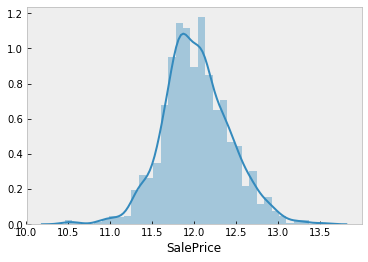

In [70]:
sns.distplot(y_sale['SalePrice'])


## PCA

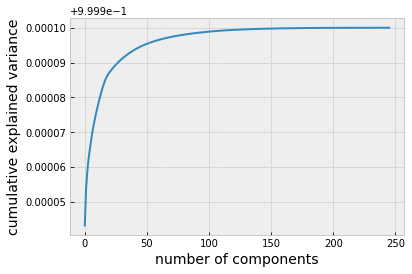

In [82]:
from sklearn.decomposition import PCA
pca = PCA().fit(housing_merge)
plt.figure(figsize = (6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', fontsize = 14)
plt.ylabel('cumulative explained variance', fontsize = 14)

plt.grid(True);

In [89]:
x_train = pca.fit_transform(housing_merge)


In [84]:
feature_names =[]

for i in range (100):
    
    feature_indx = np.abs(pca.components_[i]).argmax()
    feature_names.append(housing_merge.columns[feature_indx])
    
feature_dict = {'PC{}'.format(i+1):feature_names[i] for i in range(100)}
pd.DataFrame(list(feature_dict.items()), columns=['PC', 'Name']).head(25)

,PC,Name
0,PC1,Id
1,PC2,OverallQual
2,PC3,Has2flor
3,PC4,Fireplaces
4,PC5,PoolArea
5,PC6,BsmtUnfSF
6,PC7,hasBsmt
7,PC8,hasGarage
8,PC9,hasFireplace
9,PC10,MiscVal


In [74]:
housing_merge = pd.concat([housing_merge, id_temp], axis=1)

In [75]:
print(housing_merge.shape)

(2919, 246)


In [76]:
print(y_sale.shape)

(1460, 1)


### To CSV


In [77]:
housing_train = pd.DataFrame(housing_merge.iloc[0:1460, :])
housing_test = pd.DataFrame(housing_merge.iloc[1460:,:])

y_train = pd.DataFrame( y_sale)

In [78]:
housing_train.to_csv('housing_train.csv', index = False)
housing_test.to_csv('housing_test.csv', index = False)



y_train.to_csv('y_housing.csv', index = False)